<a href="https://colab.research.google.com/github/fedhere/MLTSA22_KRainich/blob/main/HW2/KRainich_HW2_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB :  very very well done</font>

In [ ]:
#imports
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#kaggle data
!pip install kaggle

In [ ]:
!pwd

/content


In [ ]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
!ls .kaggle

kaggle.json  STOCK


In [ ]:
cd /content/gdrive/MyDrive/.kaggle

/content/gdrive/MyDrive/.kaggle


In [ ]:
!chmod 600 kaggle.json

In [ ]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
os.environ

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20220127', 'JPY_PARENT_PID': '53', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [ ]:
!kaggle datasets

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [ ]:
!kaggle datasets list -s stock

ref                                                       title                                      size  lastUpdated          downloadCount  
--------------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
mattiuzc/stock-exchange-data                              Stock Exchange Data                         5MB  2021-06-07 20:51:55          13604  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                 492MB  2017-11-16 14:53:29          84171  
dgawlik/nyse                                              New York Stock Exchange                    31MB  2017-02-22 10:18:25          63233  
jacksoncrow/stock-market-dataset                          Stock Market Dataset                      522MB  2020-04-02 10:55:57          11968  
hk7797/stock-market-india                                 Stock Market India                          1GB  2021-01-02 03:44:23          

In [ ]:
cd /content/gdrive/MyDrive/MLTSA22/HW2/Data

/content/gdrive/MyDrive/MLTSA22/HW2/Data


In [ ]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls /content/gdrive/MyDrive/MLTSA22/HW2/Data

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
files = glob.glob("Data/Stocks/*.txt")
allfiles = np.sort(np.array(files))

In [ ]:
allfiles[:10]

array(['Data/Stocks/a.us.txt', 'Data/Stocks/aa.us.txt',
       'Data/Stocks/aaap.us.txt', 'Data/Stocks/aaba.us.txt',
       'Data/Stocks/aac.us.txt', 'Data/Stocks/aal.us.txt',
       'Data/Stocks/aamc.us.txt', 'Data/Stocks/aame.us.txt',
       'Data/Stocks/aan.us.txt', 'Data/Stocks/aaoi.us.txt'], dtype='<U28')

In [ ]:
tss = pd.read_csv(allfiles[0])
tss = tss[['Date', 'Close']]
tss = tss.rename(columns = {'Close': 'a'})
for i in allfiles[1:10]:
  df = pd.read_csv(i)
  tss = tss.merge(df[['Date', 'Close']], on = 'Date')
  tss = tss.rename(columns = {'Close': str(i[12:-7])}) 

In [ ]:
tss.set_index("Date", inplace=True)

In [ ]:
tss.head()

,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [ ]:
tss.tail()

,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi
Date,,,,,,,,,,
2017-11-02,68.13,47.46,81.00,70.51,10.02,47.257,88.00,3.65,35.80,39.28
2017-11-03,68.37,47.12,80.99,70.23,10.08,47.346,80.40,3.60,36.43,37.82
2017-11-07,68.25,46.97,81.00,72.22,11.07,46.358,81.00,3.40,34.44,37.89
2017-11-09,67.47,43.33,81.00,70.19,10.88,45.670,84.05,3.50,35.62,43.20
2017-11-10,66.81,43.01,80.98,70.56,11.28,45.820,80.10,3.50,36.59,45.30


In [ ]:
tss.shape

(447, 10)

Data inspection



In [ ]:
tss.iloc[0], tss.iloc[-1] 

(a       36.901
 aa      17.779
 aaap    24.500
 aaba    33.380
 aac     22.560
 aal     43.524
 aamc    20.750
 aame     4.796
 aan     24.649
 aaoi    16.760
 Name: 2015-11-11, dtype: float64, a       66.81
 aa      43.01
 aaap    80.98
 aaba    70.56
 aac     11.28
 aal     45.82
 aamc    80.10
 aame     3.50
 aan     36.59
 aaoi    45.30
 Name: 2017-11-10, dtype: float64)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


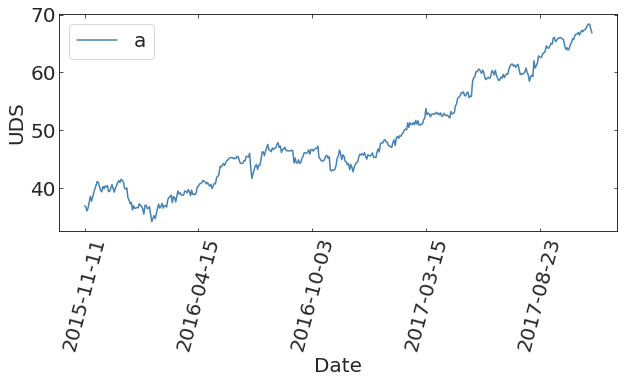

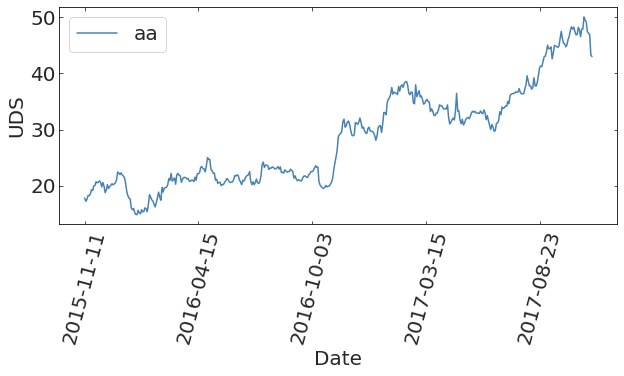

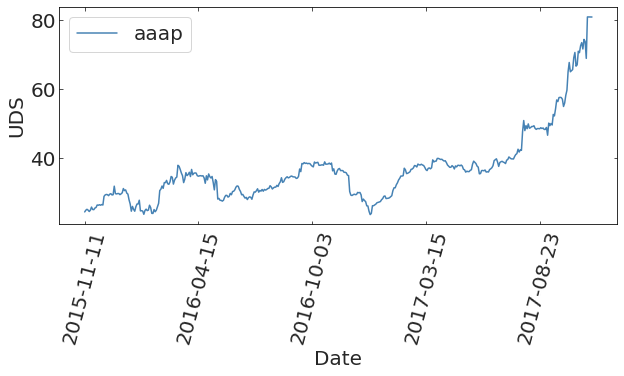

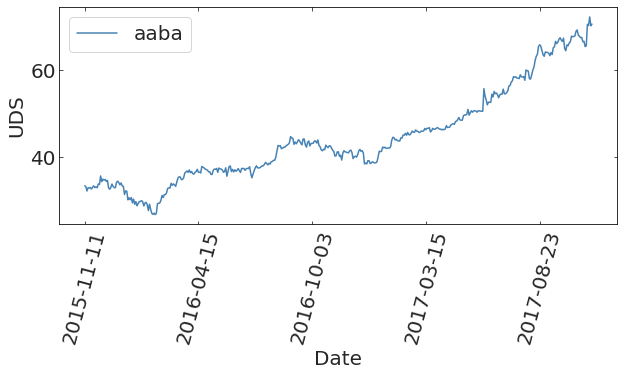

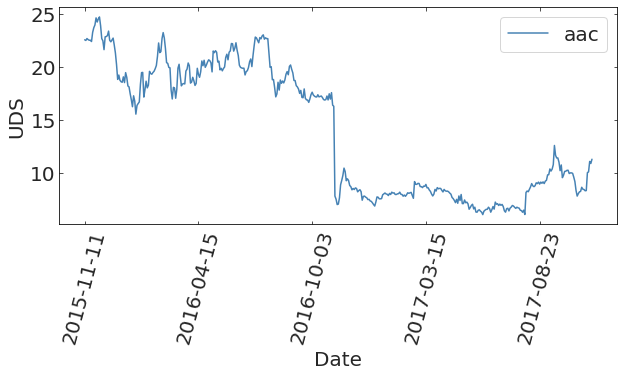

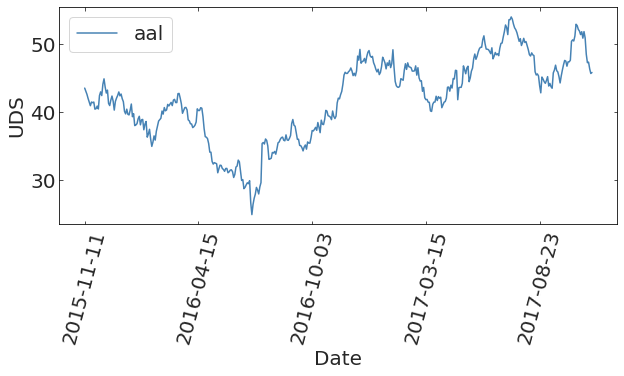

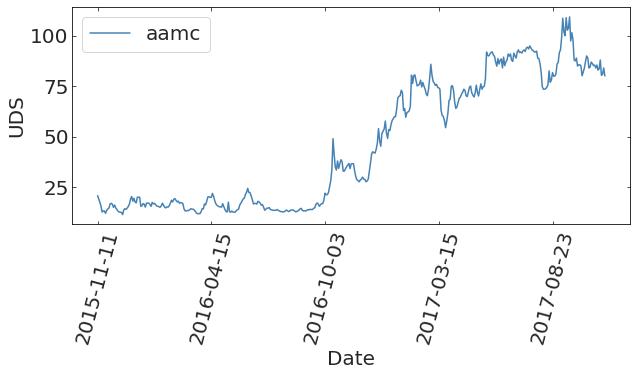

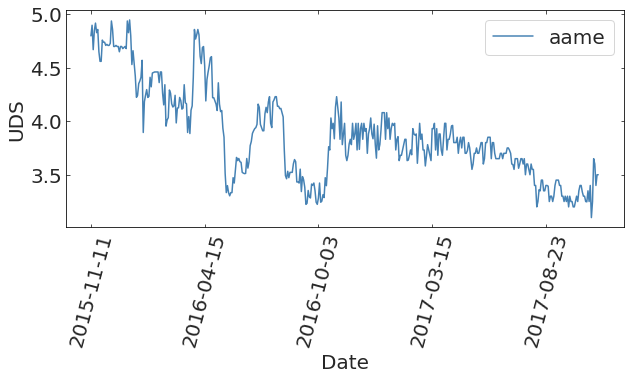

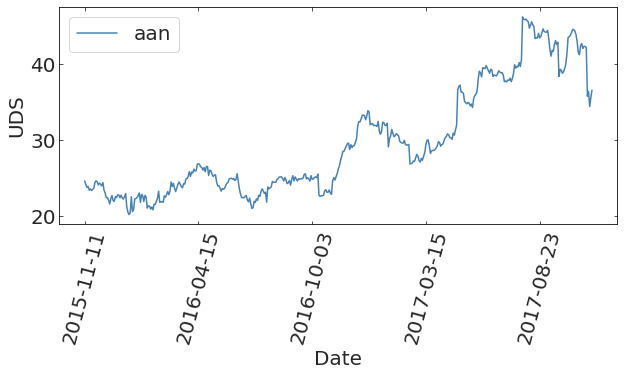

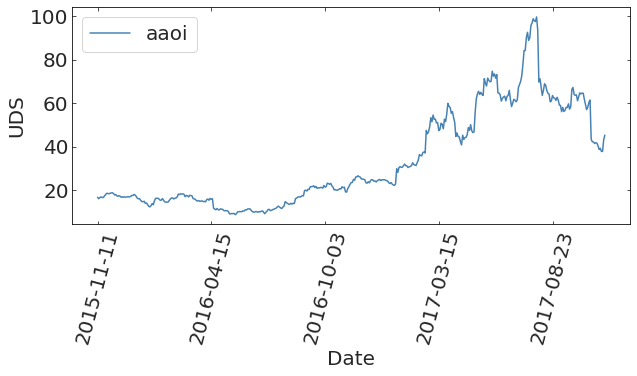

In [ ]:
for i in tss.columns:
    fig, ax = pl.subplots(figsize=(10,4))
    tss.plot(y = i, ax = ax, rot = 75)
    pl.legend()
    pl.ylabel("UDS", fontsize=20)


Fig. 1. Each subplot corresponds to the change in daily closing price for one of the 10 US-based stocks and ETFs trading over time. On the x-axis, there are points in time within viewed period, while on the y-axis - a closing price of a stock in USD. The name of the stock is in the legend to the plot. 


<font color="red"> FBB : good</font>

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


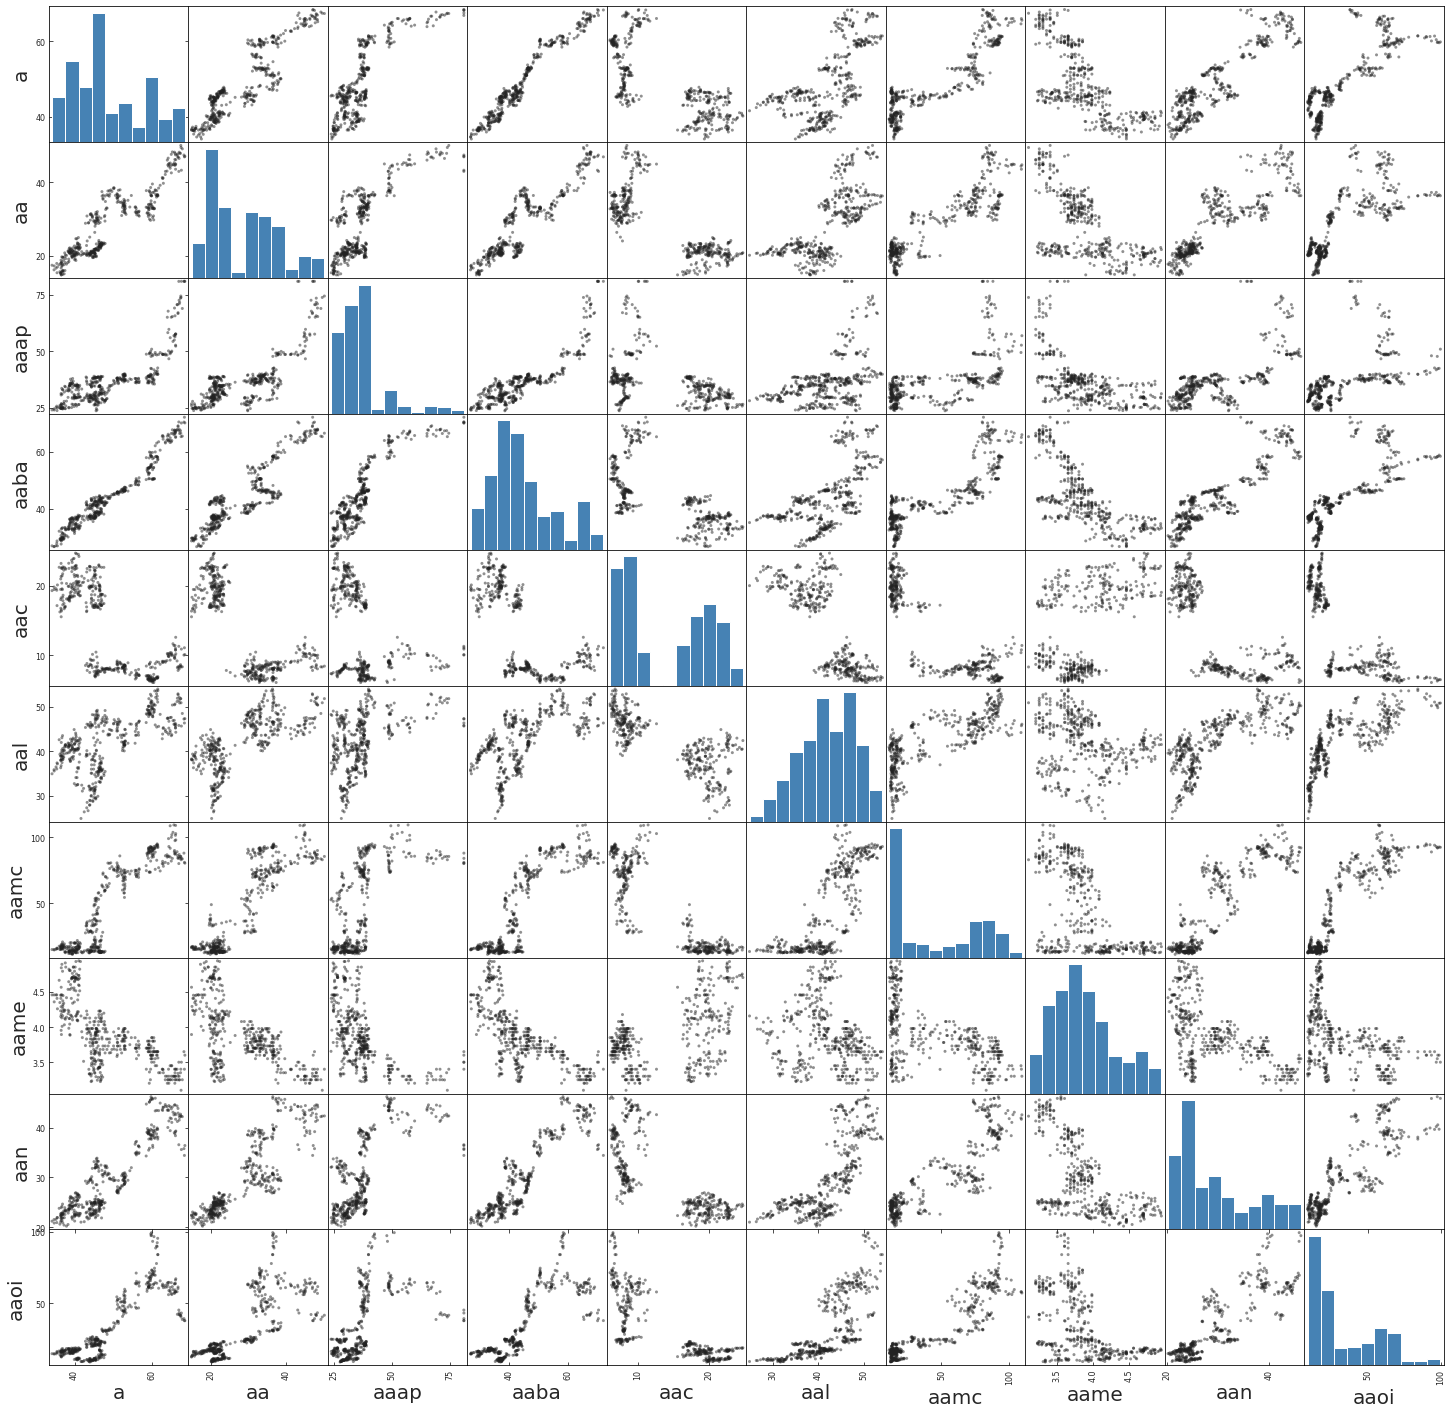

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig. 2. Scatter matrix (or pair plots) between closing prices of all stocks. On the diagonal, there are distributions of closing price for each of the stocks. In other cells there are scatterplots (=correlation plots) of each variable combination. 

<font color="red"> FBB : good!</font>

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi
a,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


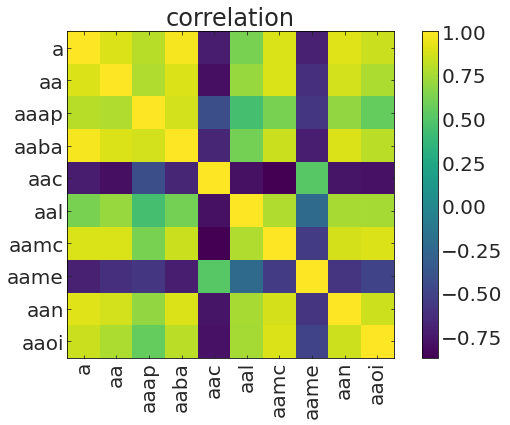

In [ ]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);

Fig. 3. Heat map for correlations between closing prices of all stocks. The color bar depicts the correlation coefficients and the color with what they're associated. -1 stands for strong negative correlation, +1 - for strong positive, 0 means no linear relationship. It is noticeable that the stocks "aac" and "aame" are negatively correlated with all of the stocks except for each other (moderate positive correlation). All other stocks are from moderately to strongly correlating with each other. 


<font color="red"> FBB : very nice</font>

Testing for stationary

In [ ]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for i in tss.columns:
    pvalue = sm.tsa.stattools.adfuller(tss[i])[1] #the function returns MacKinnon’s approximate p-value
    if pvalue <= threshold:
      print(i + ' is stationary: True')
    else:
      print(i + ' is stationary: False')

Stationarity results from the AD Fuller test at a p-value of 0.05
a is stationary: False
aa is stationary: False
aaap is stationary: False
aaba is stationary: False
aac is stationary: False
aal is stationary: False
aamc is stationary: False
aame is stationary: True
aan is stationary: False
aaoi is stationary: False
